# <span style="color:#336699">Exploratory data analysis for GOES-16 data using Python

<hr style="border:2px solid #0077b9;">


- Jupyter notebook supports manipulation of GOES-16 satellite data.



## Contents
* [1 - Basic Introduction about GOES-16](#intro)
* [2 - Data Sources](#sources)
* [3 - Example 1 ( Visualization AWS Data)](#awsexample)
* [4 - Example 2 ( Crop and Reprojection)](#reprojection)
* [5 - Example 3 ( Get Statistics of cropped image )](#statistics)
    
<hr style="border:1px solid #0077b9;">

<a id='intro'></a>
## Introduction

<p align="justify"> <br>
Geostationary Operational Environmental Satellites (GOES) are developed, launched and operated in a collaborative effort by NOAA and NASA, and have been in operation since 1975. The GOES-R Series is a four satellite program, which maintains two operational satellites at all times, as well as third standby satellite in “storage mode” on-orbit as a ready spare (currently GOES-14).
    
    
* <strong>GOES-R</strong> (GOES-16, GOES East) launched in November 2016, replacing GOES-13. It orbits at 75.2⁰ W longitude, with coverage of North and South America and the Atlantic Ocean to the west coast of Africa

* Advanced Baseline Imager (<strong>ABI</strong>): - the primary instrument for imaging Earth’s
weather, oceans and environment.
 
    
#### - GOES-R Data Product (L2)

* L2+ products contain environmental physical qualities, such as cloud top height or land surface temperature.
   

#### - GOES-16 ABI Summary
<span> <img src="./img/Summary-of-the-bands-on-the-future-GOES-Imagers-ABI.png" style="height:320px;" align="center"></span>


#### - GOES-16 ABI Scan modes and domains
<span> <img src="./img/goesr-19-1024x646.jpg" style="height:320px;" align="left"></span>
<span> <img src="./img/goesr-20-512x483.jpg" style="height:320px;" align="rigth"></span>


For complete information read GOES-R Begginers guide and GOES-R Data Book available in the [references](#reference).
    

<hr style="border:1px solid #0077b9;">

<a id='sources'></a>
## Data Sources

You can download GOES-R products from different databases, in this notebook we will list the following:

* [Amazon AWS](https://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi) (Best source)
* [DSA - INPE](http://ftp.cptec.inpe.br/goes/goes16)

* [NOAA](https://www.avl.class.noaa.gov/saa/products/ftpsInstructions)
* [Google Cloud](https://console.cloud.google.com/marketplace/product/noaa-public/goes-16?filter=category:science-research&id=5babd633-afa0-4e40-9dba-0587f4aabc47)


<p align="justify"> <br>

<a id='sources'></a>
## Example 1 (AWS)

Here we will have an example of the first steps to understand what the ABI instrument images look like for the GOES-16 satellite. And then we will apply reprojection and cropping operations on the images.


#### Step 1:

Go to download page: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi and set on interface like image below.

<span> <img src="./img/screen01.png" style="height:250px;" align="center"></span>

##### Step 2:
Select Band 13 and click in any time for download netCDF file.
<span> <img src="./img/screen02.png" style="height:50px;" align="center"></span>


#### Step 3:
Save file into data directory.
<span> <img src="./img/screen03.png" style="height:120px;" align="center"></span>

#### Step 4:
You can use QGIS or Panoply for data visualization.\
QGIS - http://qgis.org/ \
Panoply - https://www.giss.nasa.gov/tools/panoply/download/


<span> <img src="./img/screen_qgis.png" style="height:260px;" align="left"></span>
<span> <img src="./img/screen_panoply.png" style="height:260px;" align="left"></span>

<br>< 
#### Step 5:
##### Installing necessary libraries and openning file using Python.

In [1]:
# Import libs
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray
import metpy
import os
import glob
import pathlib
import pandas as pd
from datetime import datetime
from osgeo import gdal, osr

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Open file
file_path = './data/OR_ABI-L2-CMIPF-M6C13_G16_s20221310000205_e20221310009524_c20221310010005.nc'

In [3]:
# Open data using netCDF4
nc = netCDF4.Dataset(file_path)

# Open data using xarray
xr = xarray.open_dataset(file_path)

In [4]:
# print variables in netCDF4
nc.variables.keys()

dict_keys(['CMI', 'DQF', 't', 'y', 'x', 'time_bounds', 'goes_imager_projection', 'y_image', 'y_image_bounds', 'x_image', 'x_image_bounds', 'nominal_satellite_subpoint_lat', 'nominal_satellite_subpoint_lon', 'nominal_satellite_height', 'geospatial_lat_lon_extent', 'band_wavelength', 'band_id', 'total_number_of_points', 'valid_pixel_count', 'outlier_pixel_count', 'min_brightness_temperature', 'max_brightness_temperature', 'mean_brightness_temperature', 'std_dev_brightness_temperature', 'planck_fk1', 'planck_fk2', 'planck_bc1', 'planck_bc2', 'algorithm_dynamic_input_data_container', 'percent_uncorrectable_GRB_errors', 'percent_uncorrectable_L0_errors', 'earth_sun_distance_anomaly_in_AU', 'processing_parm_version_container', 'algorithm_product_version_container', 'esun', 'kappa0', 'focal_plane_temperature_threshold_exceeded_count', 'maximum_focal_plane_temperature', 'focal_plane_temperature_threshold_increasing', 'focal_plane_temperature_threshold_decreasing', 'channel_integration_time', '

In [5]:
# print data in xarray
xr

<xarray.Dataset>
Dimensions:                                           (y: 5424, x: 5424, number_of_time_bounds: 2, number_of_image_bounds: 2, band: 1)
Coordinates:
    t                                                 datetime64[ns] ...
  * y                                                 (y) float32 0.1518 ... ...
  * x                                                 (x) float32 -0.1518 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    band_wavelength                                   (band) float32 ...
    band_id                                           (band) int32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, band
Data variables: (12/35)
    CMI                                               (y, x) float32 ...
    DQF                                               (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    ...                                                ...
    focal_plane_temperature_threshold_exceeded_count  float64 ...
    maximum_focal_plane_temperature                   float32 ...
    focal_plane_temperature_threshold_increasing      float32 ...
    focal_plane_temperature_threshold_decreasing      float32 ...
    channel_integration_time                          float64 ...
    channel_gain_field                                float64 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2022-05-11T00:00:20.5Z
    time_coverage_end:         2022-05-11T00:09:52.4Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        92f777e6-391e-4039-98a5-a42bd44f1f60

In [6]:
# netCDF matrix for CMI variable
netcdf_matrix = nc['CMI'][:].filled(np.nan)
netcdf_matrix

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [7]:
# xarray matrix for CMI variable
xarray_matrix = xr['CMI'][:].values
xarray_matrix

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

Text(0.5, 1.0, 'xarray')

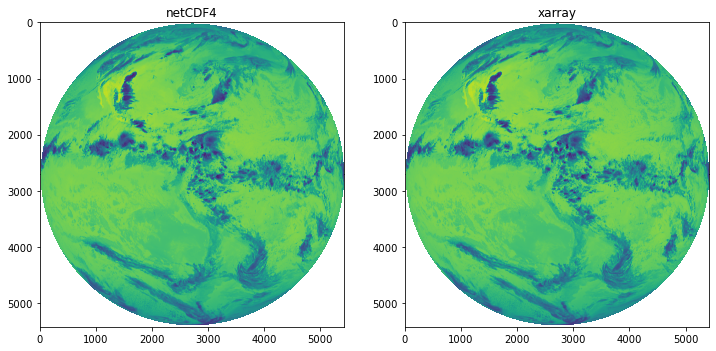

In [8]:
# Create figures side by side and plot netcdf_matrix and xarray_matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(netcdf_matrix)
ax[1].imshow(xarray_matrix)
ax[0].set_title('netCDF4')
ax[1].set_title('xarray')


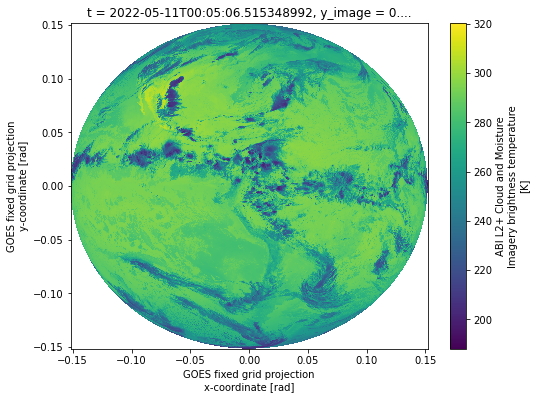

In [9]:
# Plot using xarray 
xr.CMI.plot(figsize=(8, 6))

In [10]:
# Verify projection from xarray
dat = xr.metpy.parse_cf('CMI')
geos = dat.metpy.cartopy_crs
print('Projection using xarray:',geos)

Projection using xarray: <cartopy.crs.Geostationary object at 0x7f8f6016c310>


In [11]:
# Verify projection from netCDF4
print('\n\nProjection using netCDF4:',nc.variables['goes_imager_projection'])



Projection using netCDF4: <class 'netCDF4._netCDF4.Variable'>
int32 goes_imager_projection()
    long_name: GOES-R ABI fixed grid projection
    grid_mapping_name: geostationary
    perspective_point_height: 35786023.0
    semi_major_axis: 6378137.0
    semi_minor_axis: 6356752.31414
    inverse_flattening: 298.2572221
    latitude_of_projection_origin: 0.0
    longitude_of_projection_origin: -75.0
    sweep_angle_axis: x
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


In [12]:
# For Cartopy we need to create a projection object and set extent

# Set projection using xarray
proj4 = geos

# Global extent
extent = geos.x_limits + geos.y_limits

print('Proj4:',proj4)
print('Extent:',extent)

Proj4: <cartopy.crs.Geostationary object at 0x7f8f6016c310>
Extent: (-5434182.0342756845, 5434182.0342756845, -5434182.034275684, 5434182.034275684)


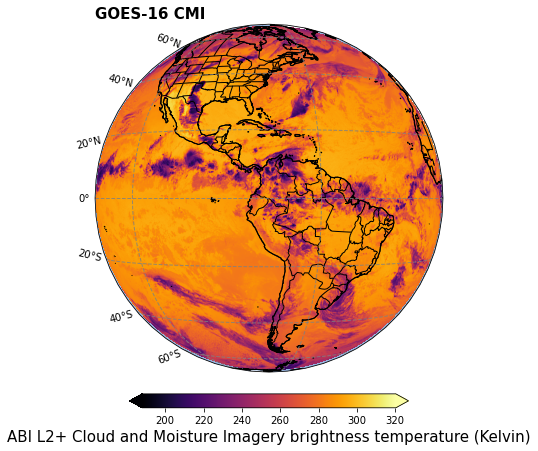

In [13]:
fig = plt.figure(figsize=(10, 8))

# Create axis with Geostationary projection
ax = fig.add_subplot(1, 1, 1, projection=proj4)

# Add the RGB image to the figure. The data is in the same projection as the
# axis we just created.
cs = ax.imshow(xarray_matrix, origin='upper', cmap='inferno',
          extent=extent, transform=proj4)

# Add colorbar
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5, aspect=20, pad=0.05, extend='both', ax=ax)
cbar.set_label('ABI L2+ Cloud and Moisture Imagery brightness temperature (Kelvin)', fontsize=15)

# Get features from cartopy
provinces_50m = cfeature.NaturalEarthFeature('cultural',
                                            'admin_1_states_provinces_lines',
                                            '50m',
                                            facecolor='none')
ax.add_feature(provinces_50m)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
ax.coastlines(resolution='50m', color='black', linewidth=1)

# Show lat/lon gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.8, linestyle='--')

# Remove xticks
gl.top_labels = None
gl.right_labels = None

plt.title('GOES-16 CMI', loc='left', fontweight='bold', fontsize=15);

<a id='sources'></a>
## Example 2 (Crop and Reprojection)

Here is an example of manipulating the GOES-16 data by doing a reprojection and cropping.


#### The purpose of this example is to perform a spatial reprojection of a netCDF file and apply a clipping to a region of interest. The parameters that we will use are the following:

* Apply scale factor into CMI variable
* Destination Projection: EPSG:4326 -> proj4: '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'
* Boundbox (extent):  (-50.899658,-2.040279,-43.549805,2.284551)

    * latitude.min(): -50.899658
    * longitude.min(): -2.040279
    * latitude.max(): -43.549805
    * longitude.max(): 2.284551<br></br>

* Fixed grid resolution at 0.01 degress (~1km)


For visualization of extent: http://bboxfinder.com/#-2.040279,-50.899658,2.284551,-43.549805 \

<span> <img src="./img/crop.png" style="height:360px;" align="center"></span>

In [14]:
# Set File path
file_path = './data/OR_ABI-L2-CMIPF-M6C13_G16_s20221310000205_e20221310009524_c20221310010005.nc'

# Set variable
variable = 'CMI'

# Set destination projection
destination_proj4 = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

# Set destination extent in lat/lon
extent = [-50.899658,-2.040279,-43.549805,2.284551]

# Set xy destination resolution
destination_resolution = (0.01, 0.01)

In [15]:
# Open file
ds = gdal.Open(f'NETCDF:'+file_path + ":" + variable)

print(ds)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f8efd862fc0> >


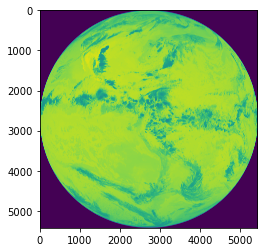

In [16]:
# Read matrix
matrix = ds.ReadAsArray(0, 0, ds.RasterXSize, ds.RasterYSize)
plt.imshow(matrix)

In [17]:
# Get scale, offset, undef and nodata
scale = ds.GetRasterBand(1).GetScale()
offset = ds.GetRasterBand(1).GetOffset()
undef = ds.GetRasterBand(1).GetNoDataValue()
nodata = ds.GetRasterBand(1).GetNoDataValue()


print('Scale:',scale)
print('Offset:',offset)
print('Undef:',undef)
print('Nodata:',nodata)

Scale: 0.06145332008600235
Offset: 89.62000274658203
Undef: -1.0
Nodata: -1.0


In [18]:
print('Matrix shape:',matrix.shape)
print('Matrix type:',matrix.dtype)

print('Matrix min:',matrix.min())
print('Matrix max:',matrix.max())

# Apply scale and offset
matrix = matrix * scale + offset

print('After factors  Matrix min:',matrix.min())
print('After factors  Matrix max:',matrix.max())

Matrix shape: (5424, 5424)
Matrix type: int16
Matrix min: -1
Matrix max: 3754
After factors  Matrix min: 89.55854942649603
After factors  Matrix max: 320.31576634943485


In [19]:
# Get source projection
source_prj = osr.SpatialReference()
source_prj.ImportFromProj4(ds.GetProjectionRef())

# Set destination projection
target_prj = osr.SpatialReference()
target_prj.ImportFromProj4(destination_proj4)

0

In [20]:
# Apply scale, offset, and undef
GeoT = ds.GetGeoTransform()
driver = gdal.GetDriverByName('netCDF')
raw = driver.Create('raw', matrix.shape[1], matrix.shape[0], 1, gdal.GDT_Float32)
raw.SetGeoTransform(GeoT)
raw.GetRasterBand(1).WriteArray(matrix)

# Define the parameters of the output file
kwargs = {'format': 'netCDF',
            'srcSRS': source_prj,
            'dstSRS': target_prj,
            'outputBounds': (extent[0], extent[3], extent[2], extent[1]),
            'outputBoundsSRS': target_prj,
            'srcNodata': undef,
            'dstNodata': nodata,
            'xRes': destination_resolution[0],
            'yRes': destination_resolution[1],
            'resampleAlg': gdal.GRA_NearestNeighbour  # Reamostragem NearestNeighbour
            }

# Write the reprojected file on disk
gdal.Warp('crop.nc', raw, **kwargs)

# Close the file
raw.FlushCache()

# Remove raw
os.remove('raw')

In [21]:
# Open the file
crop = xarray.open_dataset('crop.nc')

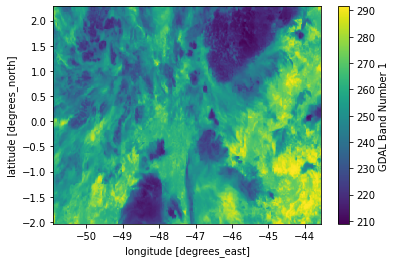

In [22]:
crop.Band1.plot()

In [23]:
# Verify projection from xarray
dat = crop.metpy.parse_cf('Band1')
geos = dat.metpy.cartopy_crs
print('Projection using xarray:',geos)

Projection using xarray: <cartopy.crs.PlateCarree object at 0x7f8efd4c18b0>


In [24]:
# For Cartopy we need to create a projection object and set extent

# Set projection using xarray
proj4 = geos

# Global extent
extent = (dat.lon[:].values.min(), dat.lon[:].values.max(), dat.lat[:].values.min(), dat.lat[:].values.max())

print('Proj4:',proj4)
print('Extent:',extent)

Proj4: <cartopy.crs.PlateCarree object at 0x7f8efd4c18b0>
Extent: (-50.894658, -43.554658, -2.035279, 2.2747210000000004)


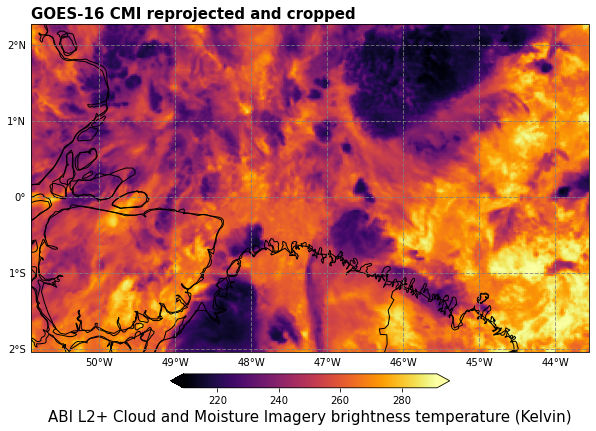

In [25]:
fig = plt.figure(figsize=(10, 8))

# Create axis with Geostationary projection
ax = fig.add_subplot(1, 1, 1, projection=proj4)

# Add the RGB image to the figure. The data is in the same projection as the
# axis we just created.
cs = ax.imshow(crop.Band1.values, origin='upper', cmap='inferno',
          extent=extent, transform=proj4)

# Add colorbar
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5, aspect=20, pad=0.05, extend='both', ax=ax)
cbar.set_label('ABI L2+ Cloud and Moisture Imagery brightness temperature (Kelvin)', fontsize=15)

# Get features from cartopy
provinces_50m = cfeature.NaturalEarthFeature('cultural',
                                            'admin_1_states_provinces_lines',
                                            '50m',
                                            facecolor='none')
ax.add_feature(provinces_50m)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
ax.coastlines(resolution='50m', color='black', linewidth=1)

# Show lat/lon gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.8, linestyle='--')

# Remove xticks
gl.top_labels = None
gl.right_labels = None

plt.title('GOES-16 CMI reprojected and cropped', loc='left', fontweight='bold', fontsize=15);

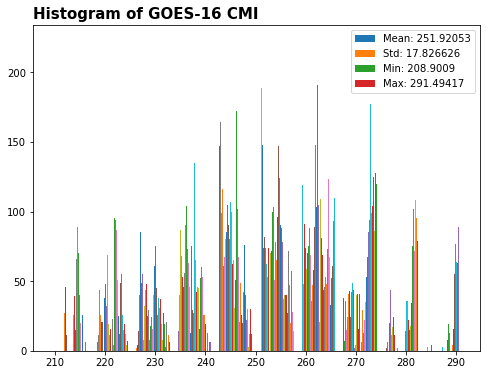

In [26]:
# Create a figure to plot histogram of crop.Band1.values
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(crop.Band1.values)
ax.legend(['Mean: ' + str(np.mean(crop.Band1.values)),'Std: ' + str(np.std(crop.Band1.values)),'Min: ' + str(np.min(crop.Band1.values)),'Max: ' + str(np.max(crop.Band1.values))])
plt.title('Histogram of GOES-16 CMI', loc='left', fontweight='bold', fontsize=15);


<a id='sources'></a>
## Example 3 (Statistics)

Here is an example of statistics for GOES-16 data cropped.

In [27]:
# Set path of files
FILES_PATH = '/home/helvecio/goes-data-toolkit/output/DSA/ch13/'

In [28]:
# Get all files in directory using glob
files = sorted(glob.glob(FILES_PATH + '**/*.nc', recursive=True))

In [29]:
def read_file(file):
    # Open the file using netCDF4
    ds = netCDF4.Dataset(file)
    array = ds.variables['Band1'][:] / 100
    return array

In [32]:
# Create dataset
df = pd.DataFrame()

# Loop over files
for file in files[0:100]:

    # Get date
    timestamp = datetime.strptime(pathlib.Path(file).stem,'%Y%m%d_%H%M')

    # # Open file
    array = read_file(file)

    # Calculate statistics
    mean = np.mean(array)
    std = np.std(array)
    min = np.min(array)
    max = np.max(array)

    # Concatenate to dataframe
    df = df.append({'date': timestamp, 'mean': mean, 'std': std, 'min': min, 'max': max}, ignore_index=True)

# Set timestamo as datetime index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

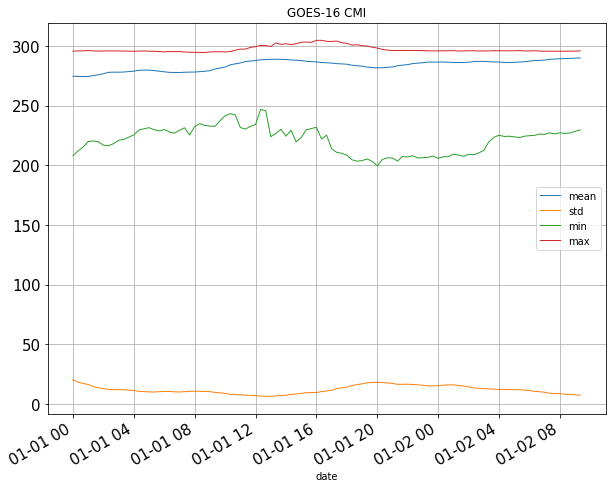

In [35]:
df.plot(title='GOES-16 CMI', figsize=(10, 8), legend=True, fontsize=15, linewidth=1,grid=True);

<a id='reference'></a>
## References

<p align="justify"> <br>

[1] Beginner’s Guide to GOES-R Series Data How to acquire, analyze, and visualize GOES-R Series data. Available in: https://www.goes-r.gov/downloads/resources/documents/Beginners_Guide_to_GOES-R_Series_Data.pdf \
[2] GOES-R Series Data Book. Available in: https://www.goes-r.gov/downloads/resources/documents/GOES-RSeriesDataBook.pdf \
[3] Scan Modes for ABI https://www.goes-r.gov/users/abiScanModeInfo.html

    

<hr style="border:1px solid #0077b9;">